# <center> <span style="color:red"><font size="+3"> Deterministic vs Stochastic and Iterative Algorithms - Matrix Factor  </font></span> </center> #

<center>* <span style="color:red">Auteur</span>           : BOUNHAR Abdelaziz</center>


# Libraries

In [1041]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [1874]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Part I : Closed-form solutions vs iterative algorithms

# Question a

$$ w_{opt} = (XX^{T} + \lambda Id)^{-1} XY$$

#### An approximation of the computational complexity for this solution.

* We know that the inverse of a matrix is O(N^3), the matrix (𝑋𝑋𝑇+𝜆𝐼𝑑)^−1 is a (d,d) matrix therefore the inverse is O(d^3).
* For matrix multiplication of 𝑋𝑋𝑇 we have O(d*N²)
* For matrix multiplication of XY we have O(d*N²)


Hence the computational complexity for this solution is **O(N^3) + O(d*N²)**

In [1043]:
def findOptimalWeight(X,Y,lmbda) :
    Xt = X.T
    XY = np.dot(X,Y)
    lambda_ID = np.full((XT.shape[0] , XT.shape[0]), lmbda)
    #print(lambda_ID)
    Z = np.dot(X,Xt) + lmbda*np.identity(X.shape[0])
    
    w_opt = np.dot(np.linalg.inv(Z), XY)
    
    print("size of w : ",w_opt.size)
    return w_opt

In [1370]:
def costFunctions(X,Y,W) :
    
    # X is dxN
    # W is dx1
    # Y is Nx1
    
    n = len(Y)
    
    predictions = np.dot(X, W)
    loss = predictions - Y   
    cost = np.sum((loss)**2)/(n)
    
    return cost

In [ ]:
def costFunctionsTesting(X,Y,W) :
    
    # X is dxN
    # W is dx1
    # Y is Nx1
    
    n = len(Y)
    
    predictions = np.dot(X, W)
    loss = predictions - Y   
    cost = np.sum((loss)**2)/(n)
    
    return cost

# Question b

## Data Preprocessing : Communities and Crime

In [1045]:
attrib = pd.read_csv('data/attributes.csv', delim_whitespace = True)

In [1046]:
df_communities = pd.read_csv("data/communities.data", sep=',', names = attrib['attributes'])

In [1047]:
df_communities

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [1048]:
df_communities = df_communities.replace('?', np.nan)

In [1049]:
def remplaceMissedValues(df, columnName) :
    
    # The feature communityname is qualitative
    if columnName == "communityname" :
        x = df[columnName].mode()
    else :
        x = df[columnName].median()
        
    for index, row in df.iterrows() :
        if pd.isna(row[columnName]):
            df.loc[index, columnName] = x

In [1050]:
columns = df_communities.columns

for columnName in columns :
    remplaceMissedValues(df_communities, columnName)

In [1051]:
df_communities

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,23,48090,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,23,48090,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.08,0.03,0.75,0.5,0.00,0.15,0.67
2,24,23,48090,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.08,0.03,0.75,0.5,0.00,0.15,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,23,48090,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,0.08,0.03,0.75,0.5,0.00,0.15,0.09
1990,6,23,48090,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,0.08,0.03,0.75,0.5,0.00,0.15,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [1052]:
df_communities.isna().sum()

state                  0
county                 0
community              0
communityname          0
fold                   0
                      ..
LemasPctPolicOnPatr    0
LemasGangUnitDeploy    0
LemasPctOfficDrugUn    0
PolicBudgPerPop        0
ViolentCrimesPerPop    0
Length: 128, dtype: int64

In [1053]:
df_communities.shape

(1994, 128)

In [1054]:
df_communities = df_communities.drop(columns=['communityname'], axis=1)

In [1055]:
df_communities = df_communities.apply(pd.to_numeric) # transforming values to float

In [1056]:
df_communities.shape

(1994, 127)

In [1062]:
X = df_communities.iloc[:, 0:126]

In [1063]:
X

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,8,23.0,48090.0,1,0.19,0.33,0.02,0.90,0.12,0.17,...,0.29,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14
1,53,23.0,48090.0,1,0.00,0.16,0.12,0.74,0.45,0.07,...,0.26,0.02,0.12,0.45,0.08,0.03,0.75,0.5,0.00,0.15
2,24,23.0,48090.0,1,0.00,0.42,0.49,0.56,0.17,0.04,...,0.26,0.01,0.21,0.02,0.08,0.03,0.75,0.5,0.00,0.15
3,34,5.0,81440.0,1,0.04,0.77,1.00,0.08,0.12,0.10,...,0.26,0.02,0.39,0.28,0.08,0.03,0.75,0.5,0.00,0.15
4,42,95.0,6096.0,1,0.01,0.55,0.02,0.95,0.09,0.05,...,0.26,0.04,0.09,0.02,0.08,0.03,0.75,0.5,0.00,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,23.0,48090.0,10,0.01,0.40,0.10,0.87,0.12,0.16,...,0.26,0.01,0.28,0.05,0.08,0.03,0.75,0.5,0.00,0.15
1990,6,23.0,48090.0,10,0.05,0.96,0.46,0.28,0.83,0.32,...,0.26,0.02,0.37,0.20,0.08,0.03,0.75,0.5,0.00,0.15
1991,9,9.0,80070.0,10,0.16,0.37,0.25,0.69,0.04,0.25,...,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28
1992,25,17.0,72600.0,10,0.08,0.51,0.06,0.87,0.22,0.10,...,0.19,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18


In [1064]:
Y = df_communities.iloc[:, 126:127]

In [1065]:
print(X.shape)
print(Y.shape)

(1994, 126)
(1994, 1)


In [1066]:
Y

,ViolentCrimesPerPop
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03
...,...
1989,0.09
1990,0.45
1991,0.23
1992,0.19


In [1067]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [1068]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Finding optimal weight

In [1069]:
XT = X_train.T
lmbda = 0.5

In [1072]:
print(XT.shape)
print(y_train.shape)

(126, 1495)
(1495, 1)


In [1073]:
start_time = time.time()
w_opt = findOptimalWeight(XT,y_train,lmbda)
end_time = time.time()
delta = end_time - start_time
print("--- Total execution time is ", delta*1000 ," miliseconds ---")

size of w :  126
--- Total execution time is  13.996362686157227  miliseconds ---


In [1074]:
w_opt

array([[-4.06445412e-04],
       [-1.84868704e-04],
       [-2.11578724e-07],
       [-2.63244777e-03],
       [-1.01392640e-02],
       [ 7.92756650e-02],
       [ 1.95779786e-01],
       [ 2.79803037e-03],
       [-2.82247362e-02],
       [ 5.15007391e-02],
       [ 1.44545102e-02],
       [-1.26237005e-01],
       [-3.14136887e-02],
       [ 9.83999446e-02],
       [-7.09140471e-02],
       [ 3.86424512e-02],
       [ 7.65501086e-02],
       [-3.36841527e-02],
       [ 3.26602732e-02],
       [-1.55488000e-01],
       [ 1.51607457e-01],
       [-8.27183159e-03],
       [-5.51686628e-02],
       [ 9.71702910e-02],
       [ 3.46045046e-02],
       [-2.08129679e-01],
       [-1.13472438e-02],
       [-2.00290164e-02],
       [ 3.22662610e-02],
       [ 3.11227151e-02],
       [ 3.85312022e-02],
       [-1.12575731e-03],
       [-1.31637790e-01],
       [-1.24211301e-01],
       [ 7.66699992e-02],
       [ 2.48565529e-02],
       [-5.16309676e-02],
       [ 1.68024568e-01],
       [-7.7

#### Computational complexity 

we have (N = 1994, d = 128), therefore : O(N^3) + O(d*N²) = O(1994^3) + O(128*1994^2) =  **O(1994^3) = O(N^3)** (since N >> d)

In [1083]:
cost_test = costFunctions(X_test,y_test,w_opt)
print(cost_test)

0.017517933248665598


### Comments on testing performances :

We have an **MSE of 0.0175** which is too small and we're good also at testing !

# Question c

## Data Preprocessing : Individual household electric power consumption

In [1541]:
df = pd.read_csv("data/household_power_consumption.txt", sep=';')

C:\Python36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1542]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0


**Attribute Information**:

1.date: Date in format dd/mm/yyyy\
2.time: time in format hh:mm:ss\
3.global_active_power: household global minute-averaged active power (in kilowatt)\
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)\
5.voltage: minute-averaged voltage (in volt)\
6.global_intensity: household global minute-averaged current intensity (in ampere)\
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).\
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.\
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.\

In [1543]:
df.shape

(2075259, 9)

In [1544]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [1545]:
# can be dropped, too much computations and the ratio of nan values is small compared to the dataset length
#remplaceMissedValues(df, "Sub_metering_3") 

In [1546]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [1547]:
#df.to_csv('energy_preprocessed.csv', index=False)  

In [1548]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [1549]:
df = df.drop(columns=['Date', 'Time'], axis=1)

In [1550]:
df = df.replace('?', np.nan)

In [1551]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [1552]:
df.shape

(2075259, 7)

In [1553]:
df = df.dropna()

In [1554]:
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [1555]:
df = df.apply(pd.to_numeric) 

In [1556]:
df.to_csv('energy_preprocessed_without_scale.csv', index=False)  

### Features scaling and normalization

We do a normalization on the dataset to prevent from blowing weight effects.

In [1535]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

#### Scanling with the MinMaxScaler

In [1536]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] # remove outliers
print(df.shape)

(1913075, 7)


In [1537]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
14,4.054,0.422,235.24,17.6,0.0,1.0,17.0
15,3.384,0.282,237.14,14.2,0.0,0.0,17.0
16,3.270,0.152,236.73,13.8,0.0,0.0,17.0
17,3.430,0.156,237.06,14.4,0.0,0.0,17.0
18,3.266,0.000,237.13,13.8,0.0,0.0,18.0
...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [1538]:
df = df[['Global_active_power', 'Global_reactive_power', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3', 'Voltage']]

In [1539]:
df

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Voltage
14,4.054,0.422,17.6,0.0,1.0,17.0,235.24
15,3.384,0.282,14.2,0.0,0.0,17.0,237.14
16,3.270,0.152,13.8,0.0,0.0,17.0,236.73
17,3.430,0.156,14.4,0.0,0.0,17.0,237.06
18,3.266,0.000,13.8,0.0,0.0,18.0,237.13
...,...,...,...,...,...,...,...
2075254,0.946,0.000,4.0,0.0,0.0,0.0,240.43
2075255,0.944,0.000,4.0,0.0,0.0,0.0,240.00
2075256,0.938,0.000,3.8,0.0,0.0,0.0,239.82
2075257,0.934,0.000,3.8,0.0,0.0,0.0,239.70


In [1540]:
minmax = MinMaxScaler()

df = minmax.fit_transform(df)

In [1442]:
df

array([[0.95031056, 0.9173913 , 0.98863636, ..., 0.05555556, 0.5483871 ,
        0.21204323],
       [0.79025323, 0.61304348, 0.79545455, ..., 0.        , 0.5483871 ,
        0.30983016],
       [0.76301959, 0.33043478, 0.77272727, ..., 0.        , 0.5483871 ,
        0.28872877],
       ...,
       [0.20592451, 0.        , 0.20454545, ..., 0.        , 0.        ,
        0.44776119],
       [0.20496894, 0.        , 0.20454545, ..., 0.        , 0.        ,
        0.44158518],
       [0.20449116, 0.        , 0.20454545, ..., 0.        , 0.        ,
        0.43386516]])

In [1443]:
df.shape

(1913075, 7)

In [1444]:
X = df[:, 0:6]
Y = df[:, 6:7]

In [1445]:
print(X.shape)
print(Y.shape)

(1913075, 6)
(1913075, 1)


In [1446]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 

In [1447]:
X_train

array([[0.19971333, 0.        , 0.19318182, 0.        , 0.        ,
        0.03225806],
       [0.04777831, 0.49130435, 0.06818182, 0.        , 0.05555556,
        0.03225806],
       [0.30052556, 0.        , 0.29545455, 0.        , 0.        ,
        0.        ],
       ...,
       [0.0339226 , 0.        , 0.04545455, 0.        , 0.        ,
        0.        ],
       [0.40802676, 0.72608696, 0.42045455, 0.10526316, 0.11111111,
        0.58064516],
       [0.65886288, 0.17391304, 0.65909091, 0.05263158, 0.05555556,
        0.5483871 ]])

In [1448]:
y_train

array([[0.67678847],
       [0.58208955],
       [0.48841997],
       ...,
       [0.39526505],
       [0.30056613],
       [0.4137931 ]])

### Finding optimal weights

In [1409]:
XT = X_train.T
lmbda = 0.5
print(XT.shape)
print(y_train.shape)

(6, 1434806)
(1434806, 1)


In [1410]:
start_time = time.time()
w_opt = findOptimalWeight(XT,y_train,lmbda)
end_time = time.time()
delta = end_time - start_time
print("--- Total execution time is ", delta*1000 ," miliseconds ---")

size of w :  6
--- Total execution time is  43.00260543823242  miliseconds ---


In [1411]:
w_opt

array([[-8.12886745],
       [ 0.56907965],
       [ 8.74921047],
       [-0.97100862],
       [-0.0742579 ],
       [ 0.07706461]])

In [1412]:
cost_test = costFunctions(X_test,y_test,w_opt)
print(cost_test)

0.11765640298370553


### Comments on testing performances :

w_opt = [-8.12886745, 0.56907965, 8.74921047, -0.97100862, -0.0742579,  0.07706461]

The **MSE is equal to 0.117** which is too small and we're good also at testing !

_Remark_ :
The fact that the weights for Global_active_power and Global_intensity are the hight one was predictible. In fact the correlations matrix gives us that **Global_active_power** is positivly correlated the **Voltage**, and **Global_intensity** is inversly correlated with the same value. That's why they have the same weghts but inverse signs

In [1432]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.166397,-0.315438,0.998411,0.162814,0.102576,0.749131
Global_reactive_power,0.166397,1.000000,-0.071054,0.190449,0.077666,0.288441,0.058307
Voltage,-0.315438,-0.071054,1.000000,-0.328950,-0.060369,-0.045909,-0.248809
Global_intensity,0.998411,0.190449,-0.328950,1.000000,0.177855,0.111890,0.738363
Sub_metering_1,0.162814,0.077666,-0.060369,0.177855,1.000000,0.015589,0.081443
Sub_metering_2,0.102576,0.288441,-0.045909,0.111890,0.015589,1.000000,0.024385
Sub_metering_3,0.749131,0.058307,-0.248809,0.738363,0.081443,0.024385,1.000000


### Observe the scalability issue of the closed-form expression 

We can see that in this case, with more data, the scalability of the closed form is not good **43 ms** for 1851064  observations compared to **14ms** for 1495 observations with more dimensions.

Still it's not really noticible here due to the fact that we don't have a lot of data, but generally, in a real case, **the inverse of a matrix is not really easy to compute in high dimensions**, this is why we tend to use the Gradient Descent technique, which will be our next objective.

# Question d : Implementing GD for Individual household electric power consumption problem

The gradient descent is in the form of :

$$w_{k+1} = w_{k} - \alpha_{k} \nabla f(w_{k})$$

where $\alpha_{k}$ is the step size to be defined

we can write $f(w)$ in the form : $$ f(W) = \frac{1}{n} \left \| X^{T}W - Y \right \|^{2} +  \lambda \left \| W \right \|^{2} $$ 

Deriving $f(w)$ we get the gradient is : 

$$\nabla f(W) = \frac{1}{N}(2XX^{T}W - 2XY) + 2\lambda W$$

where :

* $X$ is (dxN) matrix of observations
* $W$ is (dx1) vector of weights
* $Y$ is (Nx1) vector of labels
* $\lambda$ a scalar

In [1462]:
def computeGradient(X,Y,W,lmbda) :
    
    # X is dxN
    # W is dx1
    # Y is Nx1
    """ 
    print("X.shape = ",X.shape)
    print("Y.shape = ",Y.shape)
    print("W.shape = ",W.shape)
    """
    Xt = X.T
    N = len(Y)
    XT_W = np.dot(Xt, W)
    
    X_XT_W = 2*np.dot(X, XT_W)/N
    X_Y = 2*np.dot(X,Y)/N
    lmbda_W = 2*np.dot(lmbda,W)
    
    grad = X_XT_W - X_Y + lmbda_W 
    
    return grad

In [1464]:
def costFunctions(X,Y,W) :
    
    # X is dxN
    # W is dx1
    # Y is Nx1
    
    n = len(Y)
    
    predictions = np.dot(X.T, W)
    loss = predictions - Y   
    cost = np.sum((loss)**2)/(2*n)
    
    return cost

In [1465]:
def gradientDescent(X,Y,W,lmbda, alpha, N) :
    
    # X is dxN
    # W is dx1
    # Y is Nx1
                    
    errors = np.zeros(N)
    n = len(Y)
    
    for i in tqdm(range(N)) :      
        
        hypothesis = np.dot(X.T, W)
        loss = hypothesis - Y
        
        err_i = costFunctions(X,Y,W) # L2 loss
        errors[i] = err_i
        
        grad = computeGradient(X,Y,W,lmbda)
        W = W - alpha*grad
        
        #print(predictions.shape)
        
    return W, errors

In [1449]:
N = 300
alpha = 0.001 #2*N/np.trace(np.dot(XT, X))#0.001
print(alpha)
lmbda = 0.8
XT = X_train.T

W = np.zeros( (X.shape[1], 1))#/X.shape[1] # uniform
print(W)
print(XT.shape)
print(y_train.shape)

0.001
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(6, 1434806)
(1434806, 1)


In [1450]:
start_time = time.time()
w_opt, errors = gradientDescent(XT,y_train,W,lmbda, alpha, N)
end_time = time.time()
delta = end_time - start_time
print("--- Total execution time is ", delta*1000 ," miliseconds ---")




  0%|                                                                                          | 0/300 [00:00<?, ?it/s]


  0%|▎                                                                                 | 1/300 [00:00<00:35,  8.47it/s]


  1%|▌                                                                                 | 2/300 [00:00<00:35,  8.41it/s]


  1%|▊                                                                                 | 3/300 [00:00<00:35,  8.35it/s]


  1%|█                                                                                 | 4/300 [00:00<00:34,  8.60it/s]


  2%|█▎                                                                                | 5/300 [00:00<00:34,  8.67it/s]


  2%|█▋                                                                                | 6/300 [00:00<00:32,  8.91it/s]


  2%|█▉                                                                                | 7/300 [00:00<00:33,  8.80it/s]


  3%|██▏             

 45%|███████████████████████████████████▋                                            | 134/300 [00:15<00:17,  9.34it/s]


 45%|████████████████████████████████████                                            | 135/300 [00:15<00:17,  9.39it/s]


 45%|████████████████████████████████████▎                                           | 136/300 [00:15<00:17,  9.35it/s]


 46%|████████████████████████████████████▌                                           | 137/300 [00:15<00:17,  9.07it/s]


 46%|████████████████████████████████████▊                                           | 138/300 [00:15<00:18,  8.84it/s]


 46%|█████████████████████████████████████                                           | 139/300 [00:16<00:18,  8.77it/s]


 47%|█████████████████████████████████████▎                                          | 140/300 [00:16<00:18,  8.79it/s]


 47%|█████████████████████████████████████▌                                          | 141/300 [00:16<00:18,  8.56it/s]


 47%|███████████████████

 89%|███████████████████████████████████████████████████████████████████████▍        | 268/300 [00:30<00:03,  8.65it/s]


 90%|███████████████████████████████████████████████████████████████████████▋        | 269/300 [00:31<00:03,  8.64it/s]


 90%|████████████████████████████████████████████████████████████████████████        | 270/300 [00:31<00:03,  8.70it/s]


 90%|████████████████████████████████████████████████████████████████████████▎       | 271/300 [00:31<00:03,  8.86it/s]


 91%|████████████████████████████████████████████████████████████████████████▌       | 272/300 [00:31<00:03,  8.43it/s]


 91%|████████████████████████████████████████████████████████████████████████▊       | 273/300 [00:31<00:03,  8.20it/s]


 92%|█████████████████████████████████████████████████████████████████████████▎      | 275/300 [00:31<00:02,  8.71it/s]


 92%|█████████████████████████████████████████████████████████████████████████▌      | 276/300 [00:31<00:02,  9.01it/s]


 92%|███████████████████

--- Total execution time is  34703.99355888367  miliseconds ---


In [1451]:
w_opt

array([[0.04127084],
       [0.05646326],
       [0.04308433],
       [0.0009861 ],
       [0.00516414],
       [0.03936362]])

In [1453]:
def costFunctions(X,Y,W) :
    
    # X is dxN
    # W is dx1
    # Y is Nx1
    
    n = len(Y)
    
    predictions = np.dot(X, W)
    loss = predictions - Y   
    cost = np.sum((loss)**2)/(2*n)
    
    return cost

Text(0.5, 1.0, 'L2 loss over number of iterations')

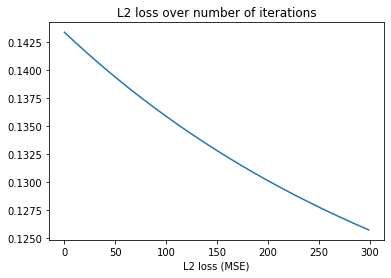

In [1458]:
plt.plot(errors)
plt.xlabel("Number of iterations")
plt.ylabel("L2 loss (MSE)")
plt.title("L2 loss over number of iterations")

In [1454]:
cost_test = costFunctions(X_test,y_test,w_opt)
print(cost_test)

0.125839747308645


In [1457]:
# training MSE (last iter) 
errors[-1]

0.12572405183423166

### Comments on testing performances :

The **MSE in the training is converging to 0.1257** and we are good also at testing since the **testing MSE is 0.1258**.

Moreover, both MSE for **GD method** and **close form** are identical (at least too close), GD runs in 34 sec rather than 43 ms, it's not really noticible here due to the fact that we don't have a lot of data, but generally, in a real case, the inverse of a matrix is not really easy to compute in high dimensions, this is why we tend to use the Gradient Descent technique.

In [1466]:
N = 5000
alpha = 0.001 #2*N/np.trace(np.dot(XT, X))#0.001
print(alpha)
lmbda = 0.8
XT = X.T

W = np.zeros( (X.shape[1], 1))#/X.shape[1] # uniform
print(W)

0.001
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [1467]:
print(XT.shape)
print(Y.shape)
print(W.shape)

(6, 1913075)
(1913075, 1)
(6, 1)


In [1468]:
start_time = time.time()
w_opt, errors = gradientDescent(XT,Y,W,lmbda, alpha, N)
end_time = time.time()
delta = end_time - start_time
print("--- Total execution time is ", delta*1000 ," miliseconds ---")




  0%|                                                                                         | 0/5000 [00:00<?, ?it/s]


  0%|                                                                                 | 2/5000 [00:00<08:14, 10.10it/s]


  0%|                                                                                 | 3/5000 [00:00<08:23,  9.92it/s]


  0%|                                                                                 | 5/5000 [00:00<08:10, 10.19it/s]


  0%|                                                                                 | 7/5000 [00:00<08:05, 10.29it/s]


  0%|▏                                                                                | 8/5000 [00:00<08:34,  9.69it/s]


  0%|▏                                                                                | 9/5000 [00:00<08:42,  9.56it/s]


  0%|▏                                                                               | 10/5000 [00:01<08:51,  9.39it/s]


  0%|▏               

  4%|██▉                                                                            | 185/5000 [00:19<08:36,  9.32it/s]


  4%|██▉                                                                            | 186/5000 [00:19<08:37,  9.30it/s]


  4%|██▉                                                                            | 187/5000 [00:19<08:38,  9.29it/s]


  4%|██▉                                                                            | 189/5000 [00:19<08:11,  9.78it/s]


  4%|███                                                                            | 190/5000 [00:19<08:20,  9.62it/s]


  4%|███                                                                            | 191/5000 [00:19<08:32,  9.37it/s]


  4%|███                                                                            | 192/5000 [00:19<08:39,  9.26it/s]


  4%|███                                                                            | 193/5000 [00:20<08:36,  9.31it/s]


  4%|███                

  7%|█████▊                                                                         | 371/5000 [00:38<07:41, 10.03it/s]


  7%|█████▉                                                                         | 373/5000 [00:38<07:40, 10.05it/s]


  8%|█████▉                                                                         | 375/5000 [00:38<07:47,  9.89it/s]


  8%|█████▉                                                                         | 376/5000 [00:38<08:12,  9.39it/s]


  8%|█████▉                                                                         | 377/5000 [00:38<08:17,  9.30it/s]


  8%|█████▉                                                                         | 378/5000 [00:39<08:23,  9.18it/s]


  8%|█████▉                                                                         | 379/5000 [00:39<08:21,  9.21it/s]


  8%|██████                                                                         | 380/5000 [00:39<08:12,  9.38it/s]


  8%|██████             

 11%|████████▉                                                                      | 566/5000 [00:58<07:41,  9.61it/s]


 11%|████████▉                                                                      | 567/5000 [00:58<07:38,  9.66it/s]


 11%|████████▉                                                                      | 568/5000 [00:58<07:41,  9.59it/s]


 11%|████████▉                                                                      | 569/5000 [00:58<07:40,  9.63it/s]


 11%|█████████                                                                      | 570/5000 [00:58<07:36,  9.71it/s]


 11%|█████████                                                                      | 571/5000 [00:58<07:54,  9.33it/s]


 11%|█████████                                                                      | 572/5000 [00:58<08:03,  9.15it/s]


 11%|█████████                                                                      | 573/5000 [00:58<08:04,  9.13it/s]


 11%|█████████          

 15%|███████████▋                                                                   | 740/5000 [01:16<07:32,  9.41it/s]


 15%|███████████▋                                                                   | 742/5000 [01:16<07:14,  9.80it/s]


 15%|███████████▊                                                                   | 744/5000 [01:16<07:00, 10.13it/s]


 15%|███████████▊                                                                   | 746/5000 [01:16<07:11,  9.85it/s]


 15%|███████████▊                                                                   | 747/5000 [01:16<07:23,  9.58it/s]


 15%|███████████▊                                                                   | 748/5000 [01:17<07:46,  9.12it/s]


 15%|███████████▊                                                                   | 749/5000 [01:17<07:52,  8.99it/s]


 15%|███████████▊                                                                   | 750/5000 [01:17<08:01,  8.83it/s]


 15%|███████████▉       

 19%|██████████████▋                                                                | 932/5000 [01:35<07:04,  9.59it/s]


 19%|██████████████▋                                                                | 933/5000 [01:35<07:09,  9.46it/s]


 19%|██████████████▊                                                                | 934/5000 [01:36<07:10,  9.45it/s]


 19%|██████████████▊                                                                | 935/5000 [01:36<07:15,  9.34it/s]


 19%|██████████████▊                                                                | 936/5000 [01:36<07:19,  9.24it/s]


 19%|██████████████▊                                                                | 937/5000 [01:36<07:12,  9.40it/s]


 19%|██████████████▊                                                                | 939/5000 [01:36<06:48,  9.93it/s]


 19%|██████████████▊                                                                | 941/5000 [01:36<06:44, 10.04it/s]


 19%|██████████████▉    

 22%|█████████████████▌                                                            | 1124/5000 [01:55<06:21, 10.16it/s]


 23%|█████████████████▌                                                            | 1126/5000 [01:55<06:21, 10.14it/s]


 23%|█████████████████▌                                                            | 1128/5000 [01:55<06:28,  9.96it/s]


 23%|█████████████████▌                                                            | 1129/5000 [01:55<06:40,  9.66it/s]


 23%|█████████████████▋                                                            | 1130/5000 [01:55<06:45,  9.53it/s]


 23%|█████████████████▋                                                            | 1131/5000 [01:56<06:50,  9.42it/s]


 23%|█████████████████▋                                                            | 1132/5000 [01:56<06:59,  9.22it/s]


 23%|█████████████████▋                                                            | 1133/5000 [01:56<07:00,  9.20it/s]


 23%|█████████████████▋ 

 26%|████████████████████▍                                                         | 1310/5000 [02:14<06:37,  9.28it/s]


 26%|████████████████████▍                                                         | 1312/5000 [02:14<06:23,  9.62it/s]


 26%|████████████████████▍                                                         | 1313/5000 [02:14<06:30,  9.43it/s]


 26%|████████████████████▍                                                         | 1314/5000 [02:14<06:26,  9.54it/s]


 26%|████████████████████▌                                                         | 1316/5000 [02:15<06:08,  9.99it/s]


 26%|████████████████████▌                                                         | 1318/5000 [02:15<05:56, 10.34it/s]


 26%|████████████████████▌                                                         | 1320/5000 [02:15<05:54, 10.38it/s]


 26%|████████████████████▌                                                         | 1322/5000 [02:15<06:00, 10.20it/s]


 26%|███████████████████

 30%|███████████████████████▍                                                      | 1504/5000 [02:34<06:18,  9.24it/s]


 30%|███████████████████████▍                                                      | 1505/5000 [02:34<06:22,  9.14it/s]


 30%|███████████████████████▌                                                      | 1507/5000 [02:34<06:02,  9.63it/s]


 30%|███████████████████████▌                                                      | 1509/5000 [02:34<05:56,  9.79it/s]


 30%|███████████████████████▌                                                      | 1510/5000 [02:34<06:04,  9.57it/s]


 30%|███████████████████████▌                                                      | 1512/5000 [02:35<05:53,  9.87it/s]


 30%|███████████████████████▌                                                      | 1513/5000 [02:35<05:54,  9.85it/s]


 30%|███████████████████████▋                                                      | 1515/5000 [02:35<05:40, 10.24it/s]


 30%|███████████████████

 34%|██████████████████████████▍                                                   | 1694/5000 [02:53<05:25, 10.17it/s]


 34%|██████████████████████████▍                                                   | 1696/5000 [02:53<05:23, 10.21it/s]


 34%|██████████████████████████▍                                                   | 1698/5000 [02:53<05:35,  9.85it/s]


 34%|██████████████████████████▌                                                   | 1699/5000 [02:54<05:47,  9.50it/s]


 34%|██████████████████████████▌                                                   | 1700/5000 [02:54<05:58,  9.22it/s]


 34%|██████████████████████████▌                                                   | 1701/5000 [02:54<06:02,  9.10it/s]


 34%|██████████████████████████▌                                                   | 1702/5000 [02:54<06:01,  9.12it/s]


 34%|██████████████████████████▌                                                   | 1704/5000 [02:54<05:42,  9.63it/s]


 34%|███████████████████

 38%|█████████████████████████████▎                                                | 1880/5000 [03:12<05:04, 10.23it/s]


 38%|█████████████████████████████▎                                                | 1882/5000 [03:12<05:11, 10.01it/s]


 38%|█████████████████████████████▍                                                | 1884/5000 [03:13<05:17,  9.83it/s]


 38%|█████████████████████████████▍                                                | 1885/5000 [03:13<05:22,  9.65it/s]


 38%|█████████████████████████████▍                                                | 1886/5000 [03:13<05:28,  9.48it/s]


 38%|█████████████████████████████▍                                                | 1887/5000 [03:13<05:37,  9.23it/s]


 38%|█████████████████████████████▍                                                | 1888/5000 [03:13<05:43,  9.06it/s]


 38%|█████████████████████████████▍                                                | 1889/5000 [03:13<05:43,  9.05it/s]


 38%|███████████████████

 41%|███████████████████████████████▉                                              | 2044/5000 [03:30<05:24,  9.10it/s]


 41%|███████████████████████████████▉                                              | 2045/5000 [03:30<05:22,  9.17it/s]


 41%|███████████████████████████████▉                                              | 2046/5000 [03:30<05:24,  9.10it/s]


 41%|███████████████████████████████▉                                              | 2048/5000 [03:30<05:08,  9.58it/s]


 41%|███████████████████████████████▉                                              | 2049/5000 [03:30<05:05,  9.67it/s]


 41%|███████████████████████████████▉                                              | 2051/5000 [03:30<05:00,  9.83it/s]


 41%|████████████████████████████████                                              | 2052/5000 [03:30<05:06,  9.62it/s]


 41%|████████████████████████████████                                              | 2053/5000 [03:30<05:02,  9.73it/s]


 41%|███████████████████

 45%|██████████████████████████████████▋                                           | 2227/5000 [03:48<05:16,  8.76it/s]


 45%|██████████████████████████████████▊                                           | 2228/5000 [03:49<05:13,  8.83it/s]


 45%|██████████████████████████████████▊                                           | 2229/5000 [03:49<05:12,  8.86it/s]


 45%|██████████████████████████████████▊                                           | 2230/5000 [03:49<05:16,  8.76it/s]


 45%|██████████████████████████████████▊                                           | 2231/5000 [03:49<05:21,  8.61it/s]


 45%|██████████████████████████████████▊                                           | 2232/5000 [03:49<05:18,  8.68it/s]


 45%|██████████████████████████████████▊                                           | 2233/5000 [03:49<05:21,  8.62it/s]


 45%|██████████████████████████████████▊                                           | 2234/5000 [03:49<05:26,  8.46it/s]


 45%|███████████████████

 48%|█████████████████████████████████████▍                                        | 2398/5000 [04:07<04:29,  9.65it/s]


 48%|█████████████████████████████████████▍                                        | 2399/5000 [04:07<04:36,  9.42it/s]


 48%|█████████████████████████████████████▍                                        | 2400/5000 [04:07<04:41,  9.24it/s]


 48%|█████████████████████████████████████▍                                        | 2401/5000 [04:07<04:43,  9.17it/s]


 48%|█████████████████████████████████████▍                                        | 2402/5000 [04:07<04:42,  9.20it/s]


 48%|█████████████████████████████████████▌                                        | 2404/5000 [04:07<04:34,  9.46it/s]


 48%|█████████████████████████████████████▌                                        | 2406/5000 [04:07<04:21,  9.92it/s]


 48%|█████████████████████████████████████▌                                        | 2408/5000 [04:08<04:12, 10.25it/s]


 48%|███████████████████

 52%|████████████████████████████████████████▍                                     | 2594/5000 [04:26<04:03,  9.87it/s]


 52%|████████████████████████████████████████▍                                     | 2595/5000 [04:27<04:06,  9.77it/s]


 52%|████████████████████████████████████████▍                                     | 2596/5000 [04:27<04:05,  9.78it/s]


 52%|████████████████████████████████████████▌                                     | 2597/5000 [04:27<04:07,  9.73it/s]


 52%|████████████████████████████████████████▌                                     | 2598/5000 [04:27<04:05,  9.78it/s]


 52%|████████████████████████████████████████▌                                     | 2599/5000 [04:27<04:07,  9.70it/s]


 52%|████████████████████████████████████████▌                                     | 2600/5000 [04:27<04:18,  9.30it/s]


 52%|████████████████████████████████████████▌                                     | 2601/5000 [04:27<04:19,  9.23it/s]


 52%|███████████████████

 56%|███████████████████████████████████████████▎                                  | 2780/5000 [04:46<03:57,  9.35it/s]


 56%|███████████████████████████████████████████▍                                  | 2781/5000 [04:46<04:01,  9.19it/s]


 56%|███████████████████████████████████████████▍                                  | 2782/5000 [04:46<04:14,  8.73it/s]


 56%|███████████████████████████████████████████▍                                  | 2783/5000 [04:46<04:06,  9.00it/s]


 56%|███████████████████████████████████████████▍                                  | 2785/5000 [04:46<03:51,  9.59it/s]


 56%|███████████████████████████████████████████▍                                  | 2786/5000 [04:46<03:50,  9.62it/s]


 56%|███████████████████████████████████████████▍                                  | 2787/5000 [04:46<03:54,  9.46it/s]


 56%|███████████████████████████████████████████▍                                  | 2788/5000 [04:46<03:56,  9.34it/s]


 56%|███████████████████

 59%|█████████████████████████████████████████████▋                                | 2931/5000 [05:02<04:01,  8.55it/s]


 59%|█████████████████████████████████████████████▋                                | 2932/5000 [05:02<04:03,  8.49it/s]


 59%|█████████████████████████████████████████████▊                                | 2933/5000 [05:03<04:04,  8.46it/s]


 59%|█████████████████████████████████████████████▊                                | 2934/5000 [05:03<04:04,  8.46it/s]


 59%|█████████████████████████████████████████████▊                                | 2935/5000 [05:03<04:09,  8.28it/s]


 59%|█████████████████████████████████████████████▊                                | 2936/5000 [05:03<04:10,  8.25it/s]


 59%|█████████████████████████████████████████████▊                                | 2937/5000 [05:03<04:09,  8.26it/s]


 59%|█████████████████████████████████████████████▊                                | 2938/5000 [05:03<03:59,  8.60it/s]


 59%|███████████████████

 61%|███████████████████████████████████████████████▊                              | 3066/5000 [05:17<03:56,  8.19it/s]


 61%|███████████████████████████████████████████████▊                              | 3067/5000 [05:17<03:50,  8.40it/s]


 61%|███████████████████████████████████████████████▊                              | 3068/5000 [05:18<03:45,  8.57it/s]


 61%|███████████████████████████████████████████████▉                              | 3069/5000 [05:18<03:38,  8.84it/s]


 61%|███████████████████████████████████████████████▉                              | 3070/5000 [05:18<03:35,  8.96it/s]


 61%|███████████████████████████████████████████████▉                              | 3071/5000 [05:18<03:32,  9.07it/s]


 61%|███████████████████████████████████████████████▉                              | 3072/5000 [05:18<03:32,  9.05it/s]


 61%|███████████████████████████████████████████████▉                              | 3073/5000 [05:18<03:31,  9.11it/s]


 61%|███████████████████

 64%|██████████████████████████████████████████████████                            | 3207/5000 [05:33<03:03,  9.79it/s]


 64%|██████████████████████████████████████████████████                            | 3209/5000 [05:33<02:56, 10.15it/s]


 64%|██████████████████████████████████████████████████                            | 3211/5000 [05:33<02:55, 10.20it/s]


 64%|██████████████████████████████████████████████████                            | 3213/5000 [05:33<03:01,  9.87it/s]


 64%|██████████████████████████████████████████████████▏                           | 3214/5000 [05:33<03:11,  9.33it/s]


 64%|██████████████████████████████████████████████████▏                           | 3215/5000 [05:34<03:15,  9.15it/s]


 64%|██████████████████████████████████████████████████▏                           | 3216/5000 [05:34<03:17,  9.04it/s]


 64%|██████████████████████████████████████████████████▏                           | 3217/5000 [05:34<03:15,  9.10it/s]


 64%|███████████████████

 68%|████████████████████████████████████████████████████▉                         | 3391/5000 [05:52<02:47,  9.63it/s]


 68%|████████████████████████████████████████████████████▉                         | 3392/5000 [05:52<02:47,  9.63it/s]


 68%|████████████████████████████████████████████████████▉                         | 3393/5000 [05:52<02:46,  9.68it/s]


 68%|████████████████████████████████████████████████████▉                         | 3394/5000 [05:52<02:45,  9.69it/s]


 68%|████████████████████████████████████████████████████▉                         | 3395/5000 [05:52<02:47,  9.56it/s]


 68%|████████████████████████████████████████████████████▉                         | 3396/5000 [05:52<02:48,  9.55it/s]


 68%|████████████████████████████████████████████████████▉                         | 3397/5000 [05:52<02:52,  9.30it/s]


 68%|█████████████████████████████████████████████████████                         | 3398/5000 [05:52<02:54,  9.19it/s]


 68%|███████████████████

 71%|███████████████████████████████████████████████████████▌                      | 3562/5000 [06:09<02:36,  9.19it/s]


 71%|███████████████████████████████████████████████████████▌                      | 3563/5000 [06:10<02:38,  9.08it/s]


 71%|███████████████████████████████████████████████████████▌                      | 3564/5000 [06:10<02:39,  9.01it/s]


 71%|███████████████████████████████████████████████████████▋                      | 3566/5000 [06:10<02:29,  9.58it/s]


 71%|███████████████████████████████████████████████████████▋                      | 3567/5000 [06:10<02:29,  9.56it/s]


 71%|███████████████████████████████████████████████████████▋                      | 3569/5000 [06:10<02:22, 10.03it/s]


 71%|███████████████████████████████████████████████████████▋                      | 3571/5000 [06:10<02:27,  9.66it/s]


 71%|███████████████████████████████████████████████████████▋                      | 3572/5000 [06:10<02:32,  9.35it/s]


 71%|███████████████████

 75%|██████████████████████████████████████████████████████████▏                   | 3731/5000 [06:27<02:17,  9.24it/s]


 75%|██████████████████████████████████████████████████████████▏                   | 3732/5000 [06:27<02:18,  9.15it/s]


 75%|██████████████████████████████████████████████████████████▏                   | 3733/5000 [06:28<02:18,  9.18it/s]


 75%|██████████████████████████████████████████████████████████▎                   | 3734/5000 [06:28<02:16,  9.28it/s]


 75%|██████████████████████████████████████████████████████████▎                   | 3735/5000 [06:28<02:17,  9.17it/s]


 75%|██████████████████████████████████████████████████████████▎                   | 3736/5000 [06:28<02:16,  9.25it/s]


 75%|██████████████████████████████████████████████████████████▎                   | 3738/5000 [06:28<02:09,  9.71it/s]


 75%|██████████████████████████████████████████████████████████▎                   | 3740/5000 [06:28<02:07,  9.88it/s]


 75%|███████████████████

 78%|████████████████████████████████████████████████████████████▊                 | 3898/5000 [06:45<02:06,  8.70it/s]


 78%|████████████████████████████████████████████████████████████▊                 | 3899/5000 [06:45<02:04,  8.81it/s]


 78%|████████████████████████████████████████████████████████████▊                 | 3900/5000 [06:45<02:02,  8.96it/s]


 78%|████████████████████████████████████████████████████████████▊                 | 3902/5000 [06:45<01:56,  9.45it/s]


 78%|████████████████████████████████████████████████████████████▉                 | 3904/5000 [06:45<01:50,  9.88it/s]


 78%|████████████████████████████████████████████████████████████▉                 | 3906/5000 [06:46<01:48, 10.11it/s]


 78%|████████████████████████████████████████████████████████████▉                 | 3908/5000 [06:46<01:45, 10.33it/s]


 78%|████████████████████████████████████████████████████████████▉                 | 3910/5000 [06:46<01:45, 10.34it/s]


 78%|███████████████████

 81%|███████████████████████████████████████████████████████████████▍              | 4069/5000 [07:03<01:47,  8.68it/s]


 81%|███████████████████████████████████████████████████████████████▍              | 4070/5000 [07:03<01:43,  8.96it/s]


 81%|███████████████████████████████████████████████████████████████▌              | 4071/5000 [07:04<01:44,  8.93it/s]


 81%|███████████████████████████████████████████████████████████████▌              | 4072/5000 [07:04<01:47,  8.61it/s]


 81%|███████████████████████████████████████████████████████████████▌              | 4073/5000 [07:04<01:52,  8.23it/s]


 81%|███████████████████████████████████████████████████████████████▌              | 4074/5000 [07:04<01:52,  8.20it/s]


 82%|███████████████████████████████████████████████████████████████▌              | 4075/5000 [07:04<01:55,  8.00it/s]


 82%|███████████████████████████████████████████████████████████████▌              | 4076/5000 [07:04<01:59,  7.76it/s]


 82%|███████████████████

 84%|█████████████████████████████████████████████████████████████████▊            | 4216/5000 [07:20<01:25,  9.16it/s]


 84%|█████████████████████████████████████████████████████████████████▊            | 4217/5000 [07:20<01:26,  9.09it/s]


 84%|█████████████████████████████████████████████████████████████████▊            | 4218/5000 [07:20<01:23,  9.32it/s]


 84%|█████████████████████████████████████████████████████████████████▊            | 4220/5000 [07:20<01:21,  9.54it/s]


 84%|█████████████████████████████████████████████████████████████████▊            | 4221/5000 [07:20<01:23,  9.30it/s]


 84%|█████████████████████████████████████████████████████████████████▊            | 4222/5000 [07:20<01:25,  9.06it/s]


 84%|█████████████████████████████████████████████████████████████████▉            | 4223/5000 [07:21<01:25,  9.04it/s]


 84%|█████████████████████████████████████████████████████████████████▉            | 4224/5000 [07:21<01:28,  8.77it/s]


 84%|███████████████████

 88%|█████████████████████████████████████████████████████████████████████         | 4425/5000 [07:42<00:54, 10.59it/s]


 89%|█████████████████████████████████████████████████████████████████████         | 4427/5000 [07:42<00:54, 10.44it/s]


 89%|█████████████████████████████████████████████████████████████████████         | 4429/5000 [07:42<00:55, 10.29it/s]


 89%|█████████████████████████████████████████████████████████████████████         | 4431/5000 [07:42<00:55, 10.18it/s]


 89%|█████████████████████████████████████████████████████████████████████▏        | 4433/5000 [07:43<00:55, 10.19it/s]


 89%|█████████████████████████████████████████████████████████████████████▏        | 4435/5000 [07:43<00:54, 10.45it/s]


 89%|█████████████████████████████████████████████████████████████████████▏        | 4437/5000 [07:43<00:52, 10.81it/s]


 89%|█████████████████████████████████████████████████████████████████████▏        | 4439/5000 [07:43<00:51, 10.81it/s]


 89%|███████████████████

 94%|█████████████████████████████████████████████████████████████████████████▏    | 4689/5000 [08:07<00:28, 10.74it/s]


 94%|█████████████████████████████████████████████████████████████████████████▏    | 4691/5000 [08:07<00:29, 10.56it/s]


 94%|█████████████████████████████████████████████████████████████████████████▏    | 4693/5000 [08:07<00:29, 10.43it/s]


 94%|█████████████████████████████████████████████████████████████████████████▏    | 4695/5000 [08:08<00:28, 10.53it/s]


 94%|█████████████████████████████████████████████████████████████████████████▎    | 4697/5000 [08:08<00:28, 10.53it/s]


 94%|█████████████████████████████████████████████████████████████████████████▎    | 4699/5000 [08:08<00:28, 10.46it/s]


 94%|█████████████████████████████████████████████████████████████████████████▎    | 4701/5000 [08:08<00:28, 10.40it/s]


 94%|█████████████████████████████████████████████████████████████████████████▎    | 4703/5000 [08:08<00:28, 10.28it/s]


 94%|███████████████████

 99%|█████████████████████████████████████████████████████████████████████████████▎| 4956/5000 [08:33<00:04, 10.08it/s]


 99%|█████████████████████████████████████████████████████████████████████████████▎| 4958/5000 [08:33<00:04,  9.94it/s]


 99%|█████████████████████████████████████████████████████████████████████████████▍| 4960/5000 [08:33<00:04,  9.91it/s]


 99%|█████████████████████████████████████████████████████████████████████████████▍| 4962/5000 [08:33<00:03, 10.29it/s]


 99%|█████████████████████████████████████████████████████████████████████████████▍| 4964/5000 [08:33<00:03, 10.28it/s]


 99%|█████████████████████████████████████████████████████████████████████████████▍| 4966/5000 [08:34<00:03, 10.57it/s]


 99%|█████████████████████████████████████████████████████████████████████████████▌| 4968/5000 [08:34<00:02, 10.83it/s]


 99%|█████████████████████████████████████████████████████████████████████████████▌| 4970/5000 [08:34<00:02, 10.74it/s]


 99%|███████████████████

--- Total execution time is  517261.0845565796  miliseconds ---


In [1469]:
w_opt

array([[0.08456633],
       [0.12279798],
       [0.08872694],
       [0.00184769],
       [0.01113126],
       [0.0776439 ]])

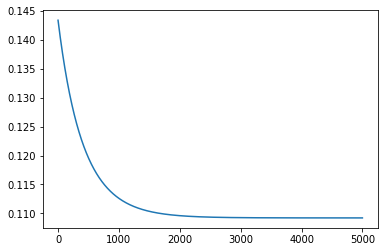

In [1470]:
plt.plot(errors)

In [1472]:
def costFunctions(X,Y,W) :
    
    # X is dxN
    # W is dx1
    # Y is Nx1
    
    n = len(Y)
    
    predictions = np.dot(X, W)
    loss = predictions - Y   
    cost = np.sum((loss)**2)/(2*n)
    
    return cost

In [1473]:
cost_test = costFunctions(X_test,y_test,w_opt)
print(cost_test)

0.10931697941598911


#### Comment :
We can achieve the lowest MSE after 2000 iterations. The lowest MSE is more close to the one of close form solution. 

# Part II: Deterministic vs Stochastic algorithms

We now consider a ridge logistic regression.

$$f(w) = \frac{1}{n} \sum_{i=1}^{N} f_{i}(w) +  \lambda \left \| w \right \|^{2}$$

where $f_{i}(w) = \log (1 +\exp(-y_{i}w^{T}x_i))$

### Let's solve the optimization problem using GD, plain stochastic GD, and SVR

### 0-a)
The gradient of $ f(w) $ is : $$ \nabla f(w) = \frac{1}{N} \sum_{i=1}^{N} (\frac{-exp(-y_{i}w^{T}x_{i})}{1+exp(-y_{i}w^{T}x_{i})})y_{i}x_{i} + 2\lambda w  $$

$$ = -\frac{1}{N} \sum_{i=1}^{N} (\frac{1}{1+exp(y_{i}w^{T}x_{i})})y_{i}x_{i} + 2\lambda w $$

we can remark that **the gradient depends on w** which mean that it's not bounded $ => $ **not Lipchitz in all the domain but it can be Locally Lipchitz as we saw in homework 1**.

The Hessian of $ f(w) $ and therefore the Lipchitz constant L is : 
$$ 
\nabla^{2} f(w) = -\frac{1}{N} \sum_{i=1}^{N} (\frac{exp(y_{i}w^{T}x_{i})}{(1+exp(y_{i}w^{T}x_{i}))^{2}})y_{i}^{2}x_{i}^{T}x_{i} + 2\lambda Id $$

### 0-b)


* we know that the L2 norm is strongly convex therefore $ \lambda \left \| w \right \|^{2} $ is strongly convex.
* $f_{i}(w) = \log (1 +\exp(-y_{i}w^{T}x_i))$ is convex.

We prooved in homework one that for any convex function **f** and a strongly convex **r**, $ r(x) + f(x) $ **is strongly convex**.

Therefore **$ f(w) $ is strongly convex**.

### 0-c)

The trick to find **L** and $ \mu $ cannot be used here sind the Hessian $ \nabla^{2} f(w) $ is **not bounded** (still depend on $w$).

### 0-d)

We can write the Hessian as : 

$$ \nabla^{2} f(w) = -\frac{1}{N} \sum_{i=1}^{N} (\frac{exp(y_{i}w^{T}x_{i})}{(1+exp(y_{i}w^{T}x_{i}))^{2}})y_{i}^{2}x_{i}^{T}x_{i} + 2\lambda Id $$

$$ = \frac{1}{N} \sum_{i=1}^{N} C_{i} y_{i}^{2}x_{i}^{T}x_{i} + 2\lambda Id $$

where $$ C_{i} = - \frac{exp(y_{i}w^{T}x_{i})}{(1+exp(y_{i}w^{T}x_{i}))^{2}} $$

$C_{i}$ is bounded in [-1,0], $Y^{T}Y$ is also bounded (and more it's constant actually) therefore the ratio $ \frac{L}{\mu} $ can be writen as :

$$ \frac{L}{\mu} = \frac{\lambda_{max}(X^{T}X + 2\lambda Id))}{\lambda_{min}(X^{T}X + 2\lambda Id)} $$

# Question a : 

#### For the Gradient Descent :

The gradient descent is in the form of :

$$w_{k+1} = w_{k} - \alpha_{k} \nabla f(w_{k})$$

here $\alpha_{k}$ is the step size to be defined

Deriving $f(w)$ we get the gradient is : 

 $$ \nabla f(w) = -\frac{1}{N} \sum_{i=1}^{N} (\frac{1}{1+exp(y_{i}w^{T}x_{i})})y_{i}x_{i} + 2\lambda w $$
 

In [1505]:
def computeGradient(X,Y,W,lmbda) :
    
    # X is dxN
    # W is dx1
    # Y is Nx1
    
    N = X.shape[0]
    #t1
    XW = np.dot(X.T,W)
    Y_X_W = np.dot( Y.T , XW)
    #t2
    exp_ = 1/(1+np.exp(Y_X_W))
    Y_exp = -np.dot( Y , exp_)
    #t3
    XT_Yexp = np.dot( X , Y_exp)/N
    
    lmbda_W = 2*np.dot(lmbda,W)
    
    grad = XT_Yexp.reshape(-1,1) + lmbda_W 
    
    return grad

In [1514]:
def costFunctions(X,Y,W, lmbda) :
    
    # X is dxN
    # W is dx1
    # Y is Nx1
    
    #t1
    XW = np.dot(X.T,W)
    Y_X_W = -np.dot( Y.T , XW)
    #t2
    loss = np.log(1+ np.exp(Y_X_W)) + lmbda*np.dot(W.T, W)
    
    return loss.mean()

In [1515]:
def gradientDescent(X,Y,W,lmbda, alpha, N) :
    
    # X is dxN
    # W is dx1
    # Y is Nx1
                    
    errors = np.zeros(N)
    n = len(Y)
    
    for i in tqdm(range(N)) :      
        
        err_i = costFunctions(X,Y,W, lmbda) # Logistic loss
        errors[i] = err_i
        
        grad = computeGradient(X,Y,W,lmbda)
        W = W - alpha*grad
        
        
    return W, errors

### Data preparation

In [1701]:
df = pd.read_csv("data/energy_preprocessed_without_scale.csv", sep=',')

In [1702]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2049275,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,0.934,0.000,239.70,3.8,0.0,0.0,0.0


(array([1.201417e+06, 6.037440e+05, 1.514830e+05, 6.375200e+04,
        1.955700e+04, 7.078000e+03, 1.678000e+03, 4.890000e+02,
        7.200000e+01, 1.000000e+01]),
 array([ 0.076 ,  1.1806,  2.2852,  3.3898,  4.4944,  5.599 ,  6.7036,
         7.8082,  8.9128, 10.0174, 11.122 ]),
 <BarContainer object of 10 artists>)

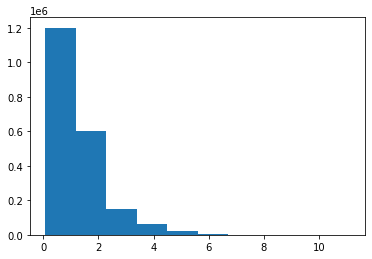

In [1703]:
plt.hist(df.Global_active_power)

#### Remark 

We can set a treshold on Global_active_power to have two classes, hence, the problem becomes a classification problem.

In [1704]:
treshold = df.Global_active_power.mean()

In [1705]:
treshold

1.0916150365006243

In [1706]:
df['Global_active_power'] = np.where(df.Global_active_power < treshold, 0, 1)

In [1707]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1,0.418,234.84,18.4,0.0,1.0,17.0
1,1,0.436,233.63,23.0,0.0,1.0,16.0
2,1,0.498,233.29,23.0,0.0,2.0,17.0
3,1,0.502,233.74,23.0,0.0,1.0,17.0
4,1,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2049275,0,0.000,240.43,4.0,0.0,0.0,0.0
2049276,0,0.000,240.00,4.0,0.0,0.0,0.0
2049277,0,0.000,239.82,3.8,0.0,0.0,0.0
2049278,0,0.000,239.70,3.8,0.0,0.0,0.0


In [1710]:
from sklearn.utils import shuffle
df = shuffle(df)

In [1711]:
df['Global_active_power'].unique()

array([0, 1])

In [1712]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] # remove outliers
print(df.shape)

(1913181, 7)


In [1713]:

df = df[['Global_reactive_power', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3', 'Voltage', 'Global_active_power']]

df = minmax.fit_transform(df)

In [1714]:
df

array([[0.53913043, 0.10227273, 0.        , ..., 0.        , 0.71796191,
        0.        ],
       [0.27391304, 0.06818182, 0.        , ..., 0.03225806, 0.63252702,
        0.        ],
       [0.1       , 0.09090909, 0.        , ..., 0.        , 0.59752959,
        0.        ],
       ...,
       [0.32608696, 0.31818182, 0.        , ..., 0.61290323, 0.70252187,
        1.        ],
       [0.53478261, 0.44318182, 0.        , ..., 0.03225806, 0.4765826 ,
        1.        ],
       [0.15652174, 0.30681818, 0.        , ..., 0.58064516, 0.45136387,
        1.        ]])

In [1715]:
# train test split
X = df[:, 0:6]
Y = df[:, 6:7]
Y = Y.astype(int)

In [1716]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 

### Finding optimal weights

In [1717]:
N = 300
alpha = 0.001 #2*N/np.trace(np.dot(XT, X))#0.001
print(alpha)
lmbda = 1.63
XT = X_train.T

W = np.zeros( (X.shape[1], 1))#/X.shape[1] # uniform
print(W)
print(XT.shape)
print(y_train.shape)

0.001
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
(6, 1434885)
(1434885, 1)


In [1718]:
start_time = time.time()
w_opt, errors_ = gradientDescent(XT,y_train,W,lmbda, alpha, N)
end_time = time.time()
delta = end_time - start_time
print("--- Total execution time is ", delta*1000 ," miliseconds ---")




  0%|                                                                                          | 0/300 [00:00<?, ?it/s]C:\Python36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':



  1%|▌                                                                                 | 2/300 [00:00<00:26, 11.24it/s]


  1%|█                                                                                 | 4/300 [00:00<00:25, 11.47it/s]


  2%|█▎                                                                                | 5/300 [00:00<00:27, 10.88it/s]


  2%|█▋                                                                                | 6/300 [00:00<00:27, 10.60it/s]


  3%|██▏                                                                               | 8/300 [00:00<00:27, 10.63it/s]


  3%|██▋                                                                              | 10/300 [00:00<00:27, 10.63it/s]


  4%|███▏          

 73%|██████████████████████████████████████████████████████████▋                     | 220/300 [00:21<00:10,  7.52it/s]


 74%|██████████████████████████████████████████████████████████▉                     | 221/300 [00:21<00:10,  7.84it/s]


 74%|███████████████████████████████████████████████████████████▏                    | 222/300 [00:21<00:09,  8.00it/s]


 74%|███████████████████████████████████████████████████████████▍                    | 223/300 [00:21<00:09,  7.90it/s]


 75%|███████████████████████████████████████████████████████████▋                    | 224/300 [00:21<00:09,  8.25it/s]


 75%|████████████████████████████████████████████████████████████                    | 225/300 [00:21<00:09,  8.19it/s]


 75%|████████████████████████████████████████████████████████████▎                   | 226/300 [00:21<00:09,  7.83it/s]


 76%|████████████████████████████████████████████████████████████▌                   | 227/300 [00:22<00:09,  7.79it/s]


 76%|███████████████████

--- Total execution time is  30848.000526428223  miliseconds ---


In [1719]:
w_opt

array([[4.62418725],
       [7.1601344 ],
       [0.19984569],
       [0.48485081],
       [8.34191902],
       [7.88392521]])

Text(0.5, 1.0, 'Loss over number of iterations')

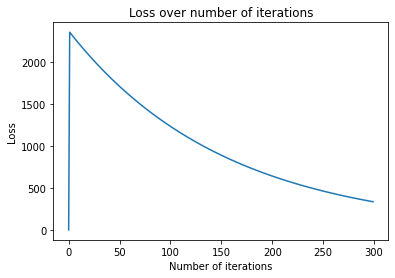

In [1720]:
plt.plot(errors_)
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.title("Loss over number of iterations")

### Testing loss

In [1721]:
cost_test = costFunctionsTesting(X_test,y_test,w_opt)
print(cost_test)

73.27668783696282


### Comments :

These results were expected, in fact we are dealing with an umbalenced class problem so we tend to overfit the data.

In [1685]:
n = len(Y)
ones = sum(Y)
zeros = n - ones
print(ones)
print(zeros)
print("ratio ones : ",ones/n)
print("ratio zeros : ",zeros/n)

[738071]
[1175110]
ratio ones :  [0.38578211]
ratio zeros :  [0.61421789]


# Part III: Matrix Factorization for Recommendation System

## 0-a)

Let's derive the subproblem corresponding to each of the optimization variable.

We have the initial problem : $$ arg min_{(p_{i}, q_{u})_{(i,u)\epsilon K}} \sum_{(i,u)\epsilon K} [([X]_{u,i}) -p_{i}^{T}q_{i})^{2} + \lambda _{i} \left \| p_{i} \right \| ^{2} + \mu _{u}\left \| q_{u} \right \|^{2}] $$

This can be written in another form each one by fixing one variable p or q. Hence we get the two subproblems :

$$ arg min_{(q_{u})_{u\epsilon K}} f(q) = \sum_{(i,u)\epsilon K} [([X]_{u,i}) -p_{i}^{T}q_{i})^{2} + \mu _{u}\left \| q_{u} \right \|^{2}] $$

$$ arg min_{(p_{i})_{i\epsilon K}} f(p) = \sum_{(i,u)\epsilon K} [([X]_{u,i}) -p_{i}^{T}q_{i})^{2} + \lambda _{i}\left \| p_{i} \right \|^{2}] $$

## 0-b)

Each subproblem can be seen as a lasso regression problem which we know is strongly convex. To detail this, one can write :

$$ \nabla ^{2} f(q) = 2PP^{T} + 2 \lambda _{p}Id $$
which implies $$ \nabla ^{2} f(q) - 2 \lambda _{p}Id \geq 0 $$

and the same for $ f(p) $ we have 

$$ \nabla ^{2} f(p) = 2QQ^{T} + 2 \lambda _{q}Id $$
which implies $$ \nabla ^{2} f(P) - 2 \lambda _{q}Id \geq 0 $$

### Question 1 :  BCD with closed-form solution

We have :
$$ arg min_{(p_{i}, q_{u})_{(i,u)\epsilon K}} \sum_{(i,u)\epsilon K} [([X]_{u,i}) -p_{i}^{T}q_{i})^{2} + \lambda _{i} \left \| p_{i} \right \| ^{2} + \mu _{u}\left \| q_{u} \right \|^{2}] $$

This can be written as : 

$$ f(P,Q) = arg min \left \| X - P^{T}Q \right \| ] + \lambda _{p} \left \| P \right \| ^{2} + \mu _{q}\left \| Q \right \|^{2} $$

$$ f(P,Q) = arg min (X - P^{T}Q)^{T}(X - P^{T}Q)+ \lambda _{p}P^{T}P + \mu _{q}Q^{T}Q $$

Therefore :
$$ \nabla _{Q} f(P,Q) = 0 <=> Q_{optimal} = (PP^{T} + \lambda Id)^{-1}P^{T}X  $$

And by the same reasoning we get :

$$ \nabla _{P} f(P,Q) = 0 <=> P_{optimal} = (QQ^{T} + \lambda Id)^{-1}Q^{T}X  $$


We have  $$ \nabla f(P,Q) = \nabla _{P} f(P,Q) + \nabla _{Q} f(P,Q) $$

for $ P = P_{optimal} $ and $ Q = Q_{optimal} $ we have :
$$ \nabla f(P_{optimal},Q_{optimal}) = 0 $$

Hence, this proves that it converges monotonically to a stationary point.

**Computational complexity per BCD iteration**

Using the same reasoning as in the first part with lasso regression, we have the inverse of a matrix is O(N^3), the matrix $ (QQ^{𝑇}+ \lambda Id)^{−1}$ is a (d,d) matrix therefore the inverse is O(d^3).\
For matrix multiplication of $QQ^{T}$ we have O(d²*N)\
For matrix multiplication of $P^{T}X$ we have O(d²*N)\
Hence the computational complexity for this solution is O(N^3) + O(d²*N)


### Question 2 : BCD with GD

Let's **derive the update equations** that result from this strategy :

We have :
$$ f(P,Q) = arg min \left \| X - P^{T}Q \right \| ] + \lambda _{p} \left \| P \right \| ^{2} + \mu _{q}\left \| Q \right \|^{2} $$

Therefore :

$$ \nabla _{P} f(P,Q) = -2(X-P^{T}Q)^{T}Q + 2\lambda Id)^P  $$
$$ \nabla _{Q} f(P,Q) = -2P^{T}(X-P^{T}Q) + 2\lambda Id)^Q  $$


And the gradient descent for each variable is in the form of :

$$P_{k+1} = P_{k} - \alpha_{k} \nabla f(P)$$
$$Q_{k+1} = Q_{k} - \alpha_{k} \nabla f(Q)$$

where $\alpha_{k}$ is the step size to be defined.

When **T -> oo** we will surely find the minimizing variables. Moreover $ \exists T_{best} \forall T' >  T_{best} $ for which the loss doesn't decrease anymore, in fact, it monotonically converges to a stationary point of f.

**The computational complexity per BCD iteration** is $O(\frac{ \alpha_{k}}{r})$ where **r** is the number of passes of all blocks. 

### Question 3 : Implementation of all algorithms using  the MovieLens 100K dataset

In [1818]:
col_users = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
df_users = pd.read_csv('data/ml-100k/u.user', sep='|', names=col_users, encoding='latin-1', parse_dates=True) 

In [1819]:
df_users

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [1820]:
col_ratings= ['user_id', 'movie_id', 'rating', 'unix_timestamp']
df_ratings = pd.read_csv('data/ml-100k/u.data', sep='\t', names=col_ratings, encoding='latin-1')

In [1821]:
df_ratings

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [1822]:
col_movies = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
df_movies = pd.read_csv('data/ml-100k/u.item', sep='|', names=col_movies, usecols=range(5), encoding='latin-1')

In [1823]:
df_movies

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)
...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998)
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...


## Data preparation

 We will use the **pivot technique** to represent the user preferences and item characteristic (P and Q)

In [1824]:
df_ratings_copy = df_ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)

In [1825]:
df_ratings_copy

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1827]:
data = df_ratings_copy.to_numpy()

#### The loss function that will be used

In [1837]:
def loss(data, P, Q):
    
    return ((data - P.dot(Q.T))**2).mean()

## BCD closed form

aka alternating least-square

In [1851]:
#  alternating least-square
def MatrixFactWithClosedForm(data, lmbda_P, lmbda_Q, nbr_dim, N):
    P = np.random.rand(data.shape[0], nbr_dim)
    Q = np.random.rand(data.shape[1], nbr_dim)
    
    erros = np.zeros(N)
    for i in range(N):
        
        error = loss(data, P, Q)
        erros[i]  = error
        
        P = np.linalg.inv(Q.T.dot(Q) + lmbda_P*np.eye(nbr_dim)).dot(Q.T).dot(data.T).T
        Q = np.linalg.inv(P.T.dot(P) + lmbda_Q*np.eye(nbr_dim)).dot(P.T).dot(data).T

    return P, Q, error_list

In [1854]:
nbr_dim = 5
lmbda_P=75
lmbda_Q=80
N=15

0.5264861233236262


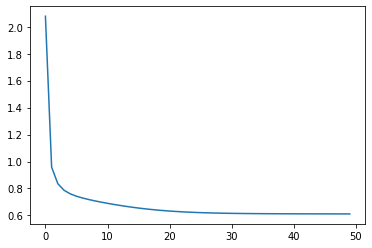

In [1855]:
P, Q, errors = MatrixFactWithClosedForm(data, lmbda_P, lmbda_Q, nbr_dim,  N)
mse = loss(data, P, Q)
print(mse)

plt.plot(errors)
plt.show()

## BCD with GD

In [1856]:
def MatrixFactWithGD(data,lmbda_P, lmbda_Q, nbr_dim, alpha, N):
    
    P = np.random.rand(data.shape[0], nbr_dim)
    Q = np.random.rand(data.shape[1], nbr_dim)
    
    erros = np.zeros(N)
    for i in range(N):
        
        error = loss(data, P, Q)
        erros[i]  = error
        
        loss_grad_P = -2*(data - P.dot(Q.T)).dot(Q) + 2*lmbda_P*P
        loss_grad_Q = -2*(data - P.dot(Q.T)).T.dot(P) + 2*lmbda_Q*Q
        P = P - alpha * loss_grad_P
        Q = Q - alpha * loss_grad_Q
    
    return P, Q, error_list

In [1871]:
nbr_dim = 5
lmbda_P=25
lmbda_Q=15
alpha=0.0004
N=10

In [1872]:
P, Q, errors = MatrixFactWithGD(data, lmbda_P, lmbda_Q, nbr_dim, alpha, N)
mse = loss(data, P, Q)
print(mse)

0.641372462727879


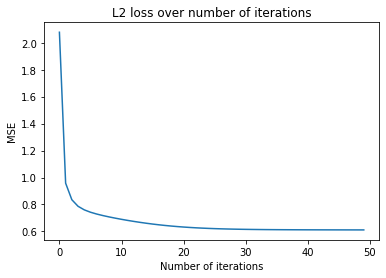

In [1873]:
plt.plot(errors)
plt.xlabel("Number of iterations")
plt.ylabel("MSE")
plt.title("L2 loss over number of iterations")
plt.show()

In [1868]:
nbr_dim = 5
lmbda_P=25
lmbda_Q=15
alpha=0.0004
N=50

In [1869]:
P, Q, errors = MatrixFactWithGD(data, lmbda_P, lmbda_Q, nbr_dim, alpha, N)
mse = loss(data, P, Q)
print("MSE = ",mse)

MSE =  0.517605772621106


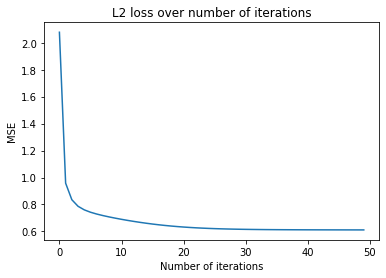

In [1870]:
plt.plot(errors)
plt.xlabel("Number of iterations")
plt.ylabel("MSE")
plt.title("L2 loss over number of iterations")
plt.show()

### Remark :

We can see that the mse stops from decreasing when we are above 20 iterations.

###  Pros and Cons of increasing T

**Pros** :
* We will surely converges to the stationary point of f.

**Cons** :
* Computation can be heavy, therefore it can take too much time, and sometimes not needed as we saw in the last figure, 20 iterations were enough to converge to the stationary point.